In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
pd.options.display.max_columns = 100

In [93]:
df_price = pd.read_csv('price_demand_data.csv')
df_price.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [94]:
df_price["DATE"] = pd.to_datetime(df_price["SETTLEMENTDATE"], dayfirst = True).dt.date
df_price.sort_values("DATE")
df_price.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,DATE
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31
11663,VIC1,1/09/2021 0:00,4811.27,MEDIUM,2021-09-01


In [95]:
df_price["PRICECATEGORY"].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [96]:
df_price['PRICECATEG'] = df_price['PRICECATEGORY'].replace(['LOW','MEDIUM','HIGH','EXTREME'],[0,1,2,3])

In [97]:
df_price['PRICECATEGORY'].value_counts()

LOW        7570
MEDIUM     3061
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

In [98]:
df_price['PRICECATEG'].value_counts()

0    7570
1    3061
2     777
3     256
Name: PRICECATEG, dtype: int64

In [99]:
df_price.loc[df_price['PRICECATEG'] == 1]

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,DATE,PRICECATEG
373,VIC1,8/01/2021 19:00,5352.25,MEDIUM,2021-01-08,1
374,VIC1,8/01/2021 19:30,5321.80,MEDIUM,2021-01-08,1
417,VIC1,9/01/2021 17:00,5452.03,MEDIUM,2021-01-09,1
418,VIC1,9/01/2021 17:30,5653.12,MEDIUM,2021-01-09,1
419,VIC1,9/01/2021 18:00,5812.76,MEDIUM,2021-01-09,1
...,...,...,...,...,...,...
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,2021-08-31,1
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,2021-08-31,1
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,2021-08-31,1
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,2021-08-31,1


In [100]:
#A model which predicts the maximum daily price category based on the provided weather data.

In [101]:
df_price_max = pd.DataFrame(df_price.groupby("SETTLEMENTDATE").PRICECATEG.max())

In [102]:
df_price_max

,PRICECATEG
SETTLEMENTDATE,
1/01/2021 0:30,0
1/01/2021 10:00,0
1/01/2021 10:30,0
1/01/2021 11:00,0
1/01/2021 11:30,0
...,...
9/08/2021 7:30,1
9/08/2021 8:00,1
9/08/2021 8:30,1


In [103]:
df_price_max.reset_index(inplace=True)

In [104]:
df_price_max

,SETTLEMENTDATE,PRICECATEG
0,1/01/2021 0:30,0
1,1/01/2021 10:00,0
2,1/01/2021 10:30,0
3,1/01/2021 11:00,0
4,1/01/2021 11:30,0
...,...,...
11659,9/08/2021 7:30,1
11660,9/08/2021 8:00,1
11661,9/08/2021 8:30,1
11662,9/08/2021 9:00,2


In [105]:
df_price_max["SETTLEMENTDATE"] = pd.to_datetime(df_price_max["SETTLEMENTDATE"])

In [106]:
df_price_max["PRICECATEG"].value_counts()

0    7570
1    3061
2     777
3     256
Name: PRICECATEG, dtype: int64

In [107]:
df_price_max.shape

(11664, 2)

In [108]:
df_weather = pd.read_csv('weather_data.csv')
df_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [109]:
df_weather["Date"] = pd.to_datetime(df_weather["Date"], format="%d/%m/%Y")
df_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-01,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [110]:
df_weather.shape

(243, 21)

In [111]:
# merge the weather data with the price data
df = pd.merge(df_price_max, df_weather, left_on="SETTLEMENTDATE", right_on="Date")

In [112]:
df

,SETTLEMENTDATE,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2021-01-02,0,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
1,2021-01-03,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
2,2021-01-04,0,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
3,2021-01-05,0,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
4,2021-01-06,0,2021-01-06,13.7,19.2,1.2,1.0,3.2,S,35.0,14:56,15.2,72.0,7,S,11,1020.0,18.1,63,7.0,SSW,17,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,2021-08-04,0,2021-08-04,7.8,14.5,0.6,1.8,3.4,WSW,31.0,12:09,10.2,78.0,7,W,11,1016.0,14.3,67,7.0,W,9,1015.5
207,2021-08-05,1,2021-08-05,9.8,15.8,0.4,1.6,3.9,WNW,31.0,14:49,11.8,80.0,7,WNW,11,1021.7,15.2,63,7.0,W,15,1020.1
208,2021-08-06,0,2021-08-06,10.7,14.2,0.2,2.2,0.6,NNW,28.0,20:22,12.1,74.0,7,WNW,9,1024.5,13.9,60,8.0,NW,13,1023.1
209,2021-08-07,2,2021-08-07,10.5,15.5,0.0,1.6,2.4,NW,30.0,6:10,11.2,75.0,7,NW,11,1026.9,13.2,75,7.0,SSW,11,1026.4


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   SETTLEMENTDATE                     211 non-null    datetime64[ns]
 1   PRICECATEG                         211 non-null    int64         
 2   Date                               211 non-null    datetime64[ns]
 3   Minimum temperature (°C)           210 non-null    float64       
 4   Maximum temperature (°C)           210 non-null    float64       
 5   Rainfall (mm)                      210 non-null    float64       
 6   Evaporation (mm)                   211 non-null    float64       
 7   Sunshine (hours)                   211 non-null    float64       
 8   Direction of maximum wind gust     208 non-null    object        
 9   Speed of maximum wind gust (km/h)  208 non-null    float64       
 10  Time of maximum wind gust          208

In [114]:
# display categorical columns
df[df.select_dtypes(include=['object']).columns]

,Direction of maximum wind gust,Time of maximum wind gust,9am wind direction,9am wind speed (km/h),3pm wind direction,3pm wind speed (km/h)
0,NNW,8:22,NNW,17,SW,4
1,WSW,17:55,WSW,4,SSW,2
2,SSE,16:03,SSE,11,SSW,17
3,SSE,11:02,SSE,13,SSE,19
4,S,14:56,S,11,SSW,17
...,...,...,...,...,...,...
206,WSW,12:09,W,11,W,9
207,WNW,14:49,WNW,11,W,15
208,NNW,20:22,WNW,9,NW,13
209,NW,6:10,NW,11,SSW,11


In [115]:
df['9am wind speed (km/h)']= pd.to_numeric(df['9am wind speed (km/h)'], errors='coerce')
df['3pm wind speed (km/h)']= pd.to_numeric(df['3pm wind speed (km/h)'], errors='coerce')

In [116]:
to_drop = ['Time of maximum wind gust','SETTLEMENTDATE']
df.drop(to_drop, axis=1, inplace=True)

In [117]:
df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,2021-01-02,18.4,29.0,0.0,9.4,1.3,NNW,30.0,23.3,52.0,7,NNW,17.0,1013.3,28.7,38,7.0,SW,4.0,1008.5
1,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,WSW,33.0,18.3,100.0,8,WSW,4.0,1007.7,23.5,59,4.0,SSW,2.0,1005.2
2,0,2021-01-04,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16.2,98.0,8,SSE,11.0,1010.0,18.2,82,8.0,SSW,17.0,1011.0
3,0,2021-01-05,15.9,19.1,11.2,1.0,0.0,SSE,35.0,17.2,96.0,8,SSE,13.0,1012.5,18.2,82,8.0,SSE,19.0,1013.3
4,0,2021-01-06,13.7,19.2,1.2,1.0,3.2,S,35.0,15.2,72.0,7,S,11.0,1020.0,18.1,63,7.0,SSW,17.0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,2021-08-04,7.8,14.5,0.6,1.8,3.4,WSW,31.0,10.2,78.0,7,W,11.0,1016.0,14.3,67,7.0,W,9.0,1015.5
207,1,2021-08-05,9.8,15.8,0.4,1.6,3.9,WNW,31.0,11.8,80.0,7,WNW,11.0,1021.7,15.2,63,7.0,W,15.0,1020.1
208,0,2021-08-06,10.7,14.2,0.2,2.2,0.6,NNW,28.0,12.1,74.0,7,WNW,9.0,1024.5,13.9,60,8.0,NW,13.0,1023.1
209,2,2021-08-07,10.5,15.5,0.0,1.6,2.4,NW,30.0,11.2,75.0,7,NW,11.0,1026.9,13.2,75,7.0,SSW,11.0,1026.4


In [118]:
# fill missing values with the mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# fill missing string with mode
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   PRICECATEG                         211 non-null    int64         
 1   Date                               211 non-null    datetime64[ns]
 2   Minimum temperature (°C)           211 non-null    float64       
 3   Maximum temperature (°C)           211 non-null    float64       
 4   Rainfall (mm)                      211 non-null    float64       
 5   Evaporation (mm)                   211 non-null    float64       
 6   Sunshine (hours)                   211 non-null    float64       
 7   Direction of maximum wind gust     211 non-null    object        
 8   Speed of maximum wind gust (km/h)  211 non-null    float64       
 9   9am Temperature (°C)               211 non-null    float64       
 10  9am relative humidity (%)          211

In [120]:
# label encoding
from sklearn.preprocessing import LabelEncoder

cat_columns = df.select_dtypes(include=['object']).columns

for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [121]:
df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,0,2021-01-02,18.4,29.0,0.0,9.4,1.3,5,30.0,23.3,52.0,7,7,17.0,1013.3,28.7,38,7.0,12,4.0,1008.5
1,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,14,33.0,18.3,100.0,8,16,4.0,1007.7,23.5,59,4.0,11,2.0,1005.2
2,0,2021-01-04,16.0,18.6,2.6,3.8,0.0,9,41.0,16.2,98.0,8,11,11.0,1010.0,18.2,82,8.0,11,17.0,1011.0
3,0,2021-01-05,15.9,19.1,11.2,1.0,0.0,9,35.0,17.2,96.0,8,11,13.0,1012.5,18.2,82,8.0,10,19.0,1013.3
4,0,2021-01-06,13.7,19.2,1.2,1.0,3.2,7,35.0,15.2,72.0,7,9,11.0,1020.0,18.1,63,7.0,11,17.0,1020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,2021-08-04,7.8,14.5,0.6,1.8,3.4,14,31.0,10.2,78.0,7,14,11.0,1016.0,14.3,67,7.0,13,9.0,1015.5
207,1,2021-08-05,9.8,15.8,0.4,1.6,3.9,13,31.0,11.8,80.0,7,15,11.0,1021.7,15.2,63,7.0,13,15.0,1020.1
208,0,2021-08-06,10.7,14.2,0.2,2.2,0.6,5,28.0,12.1,74.0,7,15,9.0,1024.5,13.9,60,8.0,7,13.0,1023.1
209,2,2021-08-07,10.5,15.5,0.0,1.6,2.4,6,30.0,11.2,75.0,7,8,11.0,1026.9,13.2,75,7.0,11,11.0,1026.4


In [122]:
#df

In [123]:
df['Avg Temp'] = pd.DataFrame((df['Minimum temperature (°C)'] + df['Maximum temperature (°C)'])/2)

In [124]:
df['AvgdayTemp'] = pd.DataFrame((df['3pm Temperature (°C)'] + df['9am Temperature (°C)'])/2)

In [125]:
df['Avghumidity']= pd.DataFrame((df['9am relative humidity (%)'] + df['3pm relative humidity (%)'])/2)

In [126]:
df['Vartoavgmaxtemp'] = pd.DataFrame((df['Maximum temperature (°C)'] - df['Maximum temperature (°C)'].mean()).abs())

In [127]:
df

,PRICECATEG,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),Avg Temp,AvgdayTemp,Avghumidity,Vartoavgmaxtemp
0,0,2021-01-02,18.4,29.0,0.0,9.4,1.3,5,30.0,23.3,52.0,7,7,17.0,1013.3,28.7,38,7.0,12,4.0,1008.5,23.70,26.00,45.0,9.72381
1,0,2021-01-03,17.0,26.2,12.6,4.8,7.1,14,33.0,18.3,100.0,8,16,4.0,1007.7,23.5,59,4.0,11,2.0,1005.2,21.60,20.90,79.5,6.92381
2,0,2021-01-04,16.0,18.6,2.6,3.8,0.0,9,41.0,16.2,98.0,8,11,11.0,1010.0,18.2,82,8.0,11,17.0,1011.0,17.30,17.20,90.0,0.67619
3,0,2021-01-05,15.9,19.1,11.2,1.0,0.0,9,35.0,17.2,96.0,8,11,13.0,1012.5,18.2,82,8.0,10,19.0,1013.3,17.50,17.70,89.0,0.17619
4,0,2021-01-06,13.7,19.2,1.2,1.0,3.2,7,35.0,15.2,72.0,7,9,11.0,1020.0,18.1,63,7.0,11,17.0,1020.0,16.45,16.65,67.5,0.07619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,0,2021-08-04,7.8,14.5,0.6,1.8,3.4,14,31.0,10.2,78.0,7,14,11.0,1016.0,14.3,67,7.0,13,9.0,1015.5,11.15,12.25,72.5,4.77619
207,1,2021-08-05,9.8,15.8,0.4,1.6,3.9,13,31.0,11.8,80.0,7,15,11.0,1021.7,15.2,63,7.0,13,15.0,1020.1,12.80,13.50,71.5,3.47619
208,0,2021-08-06,10.7,14.2,0.2,2.2,0.6,5,28.0,12.1,74.0,7,15,9.0,1024.5,13.9,60,8.0,7,13.0,1023.1,12.45,13.00,67.0,5.07619
209,2,2021-08-07,10.5,15.5,0.0,1.6,2.4,6,30.0,11.2,75.0,7,8,11.0,1026.9,13.2,75,7.0,11,11.0,1026.4,13.00,12.20,75.0,3.77619


In [128]:
corr_matrix = df.corr()

In [129]:
corr_matrix['PRICECATEG'].sort_values(ascending=False)

PRICECATEG                           1.000000
9am MSL pressure (hPa)               0.250777
9am relative humidity (%)            0.245147
Avghumidity                          0.222657
3pm MSL pressure (hPa)               0.216377
3pm relative humidity (%)            0.125661
3pm cloud amount (oktas)             0.029095
9am cloud amount (oktas)            -0.039571
9am wind speed (km/h)               -0.075153
Rainfall (mm)                       -0.075810
Direction of maximum wind gust      -0.121674
Vartoavgmaxtemp                     -0.127208
Sunshine (hours)                    -0.135213
9am wind direction                  -0.144097
3pm wind direction                  -0.144349
3pm wind speed (km/h)               -0.161770
Speed of maximum wind gust (km/h)   -0.255302
Maximum temperature (°C)            -0.330951
3pm Temperature (°C)                -0.338063
Minimum temperature (°C)            -0.359142
Avg Temp                            -0.372039
9am Temperature (°C)              

<AxesSubplot:xlabel='Avg Temp', ylabel='PRICECATEG'>

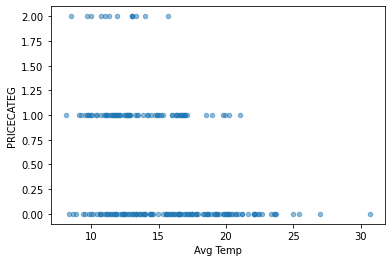

In [130]:
df.plot(kind="scatter", x="Avg Temp", y="PRICECATEG",alpha = 0.5)

<AxesSubplot:xlabel='Avg Temp', ylabel='Maximum temperature (°C)'>

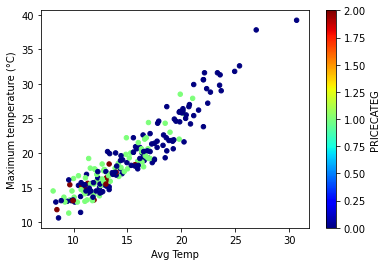

In [131]:
#plot clearly shows the red<Extreme Price group> and yellow<High price Group> 
#are more concentrated when the temperature is below 15. The Low Price group is seen when the temperature is above 15
#degrees
df.plot(kind="scatter", x="Avg Temp", y="Maximum temperature (°C)",alpha = 1,
    c="PRICECATEG", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [132]:
#A strong negative correlation between AvgTemp,AvgDayTemp,3pm temperature,maximum temperature,9am temperature,minimum temperature,
#Evaporation Sunshine hours.
#Positive correlation: 9am relative humidity (%),3pm relative humidity (%)
#By negative correlation - As Temperature decreases people tend to heat the house and the energy price increases.
#As humidity increases there could be a chance people are using more energy to cool the house.
 

In [133]:
#to_drop = ['9am MSL pressure (hPa)','3pm cloud amount (oktas)','9am relative humidity (%)','3pm relative humidity (%)',
#          '3pm MSL pressure (hPa)','9am wind speed (km/h)','Vartoavgmaxtemp','9am cloud amount (oktas)','Rainfall (mm)',
#          '3pm wind speed (km/h)','Speed of maximum wind gust (km/h)','Direction of maximum wind gust ','3pm wind direction',
#          '9am wind direction','Date']
#X = df.drop(to_drop, axis=1)

In [134]:
to_drop = ['3pm cloud amount (oktas)','3pm relative humidity (%)',
          '9am wind speed (km/h)','Vartoavgmaxtemp','9am cloud amount (oktas)','Rainfall (mm)',
          '3pm wind speed (km/h)','Speed of maximum wind gust (km/h)','Direction of maximum wind gust ','3pm wind direction',
          '9am wind direction','Date']
X = df.drop(to_drop, axis=1)

In [135]:
corr_matrix1 = X.corr()

In [136]:
corr_matrix1['PRICECATEG'].sort_values(ascending=False)

PRICECATEG                   1.000000
9am MSL pressure (hPa)       0.250777
9am relative humidity (%)    0.245147
Avghumidity                  0.222657
3pm MSL pressure (hPa)       0.216377
Sunshine (hours)            -0.135213
Maximum temperature (°C)    -0.330951
3pm Temperature (°C)        -0.338063
Minimum temperature (°C)    -0.359142
Avg Temp                    -0.372039
9am Temperature (°C)        -0.375009
AvgdayTemp                  -0.381599
Evaporation (mm)            -0.412572
Name: PRICECATEG, dtype: float64

In [137]:
X.drop('PRICECATEG', axis=1, inplace = True)

In [138]:
#X.drop('Sunshine (hours)',axis =1, inplace = True)

In [139]:
#X.drop('9am Temperature (°C)',axis = 1, inplace = True)

In [140]:
X.drop('3pm MSL pressure (hPa)',axis = 1, inplace = True)

In [141]:
X.drop('9am MSL pressure (hPa)',axis = 1, inplace = True)

In [142]:
#X.drop('Maximum temperature (°C)',axis = 1, inplace = True)

In [143]:
#X.drop('Avghumidity',axis = 1, inplace = True)

In [144]:
X

,Minimum temperature (°C),Maximum temperature (°C),Evaporation (mm),Sunshine (hours),9am Temperature (°C),9am relative humidity (%),3pm Temperature (°C),Avg Temp,AvgdayTemp,Avghumidity
0,18.4,29.0,9.4,1.3,23.3,52.0,28.7,23.70,26.00,45.0
1,17.0,26.2,4.8,7.1,18.3,100.0,23.5,21.60,20.90,79.5
2,16.0,18.6,3.8,0.0,16.2,98.0,18.2,17.30,17.20,90.0
3,15.9,19.1,1.0,0.0,17.2,96.0,18.2,17.50,17.70,89.0
4,13.7,19.2,1.0,3.2,15.2,72.0,18.1,16.45,16.65,67.5
...,...,...,...,...,...,...,...,...,...,...
206,7.8,14.5,1.8,3.4,10.2,78.0,14.3,11.15,12.25,72.5
207,9.8,15.8,1.6,3.9,11.8,80.0,15.2,12.80,13.50,71.5
208,10.7,14.2,2.2,0.6,12.1,74.0,13.9,12.45,13.00,67.0
209,10.5,15.5,1.6,2.4,11.2,75.0,13.2,13.00,12.20,75.0


In [145]:
y = df['PRICECATEG']

In [146]:
y

0      0
1      0
2      0
3      0
4      0
      ..
206    0
207    1
208    0
209    2
210    1
Name: PRICECATEG, Length: 211, dtype: int64

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as nd

In [148]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
neighbour_accuracy=[]
for neighbours in range(1,10):
    accuracy_scores=[]
    for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        features_train = X.iloc[train_index, :]
        features_test = X.iloc[test_index, :]

        class_train = y[train_index]
        class_test = y[test_index]

        scaler = preprocessing.StandardScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)

        knn = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
        knn.fit(features_train, class_train)

        predictions = knn.predict(features_test)
        accuracy_scores.append(accuracy_score(class_test, predictions))
    neighbour_accuracy.append(sum(accuracy_scores)/k)

print(neighbour_accuracy)

[0.5311688311688311, 0.6164502164502165, 0.5354978354978355, 0.5450216450216451, 0.5688311688311687, 0.5738095238095238, 0.5688311688311688, 0.5409090909090909, 0.5924242424242425]


In [149]:
#This KNN model is having an accuracy of 47% where k fold is 10 and neighbours is 8.
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)
neighbour_accuracy=[]
for neighbours in range(8,9):
    accuracy_scores=[]
    for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        features_train = X.iloc[train_index, :]
        features_test = X.iloc[test_index, :]

        class_train = y[train_index]
        class_test = y[test_index]

  
        scaler = preprocessing.StandardScaler()
        features_train = scaler.fit_transform(features_train)
        features_test = scaler.transform(features_test)

        knn = neighbors.KNeighborsClassifier(n_neighbors=neighbours)
        knn.fit(features_train, class_train)

        predictions = knn.predict(features_test)
        accuracy_scores.append(accuracy_score(class_test, predictions))
    neighbour_accuracy.append(sum(accuracy_scores)/k)
#print(accuracy_scores)
print(neighbour_accuracy)

[0.5409090909090909]


In [150]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [151]:
k = 6
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores=[]
#confusion_matrix = metrics.confusion_matrix()

for train_index, test_index in kf.split(X):
        #print(train_index, test_index)
        features_train1 = X.iloc[train_index, :]
        features_test1 = X.iloc[test_index, :]

        class_train1 = y[train_index]
        class_test1 = y[test_index]

        scaler = preprocessing.StandardScaler()
        features_train1 = scaler.fit_transform(features_train1)
        features_test1 = scaler.transform(features_test1)
        #print(features_test1)
        dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
        dt.fit(features_train1, class_train1)
        predictions1 = dt.predict(features_test1)
       
        #cm = confusion_matrix(features_test1, predictions1)
        #sns.heatmap(cm, annot=True, fmt="d")
        #plt.show()
        accuracy_scores.append(accuracy_score(class_test1, predictions1))
print(sum(accuracy_scores)/k)

0.6164021164021164


In [152]:
from sklearn import tree

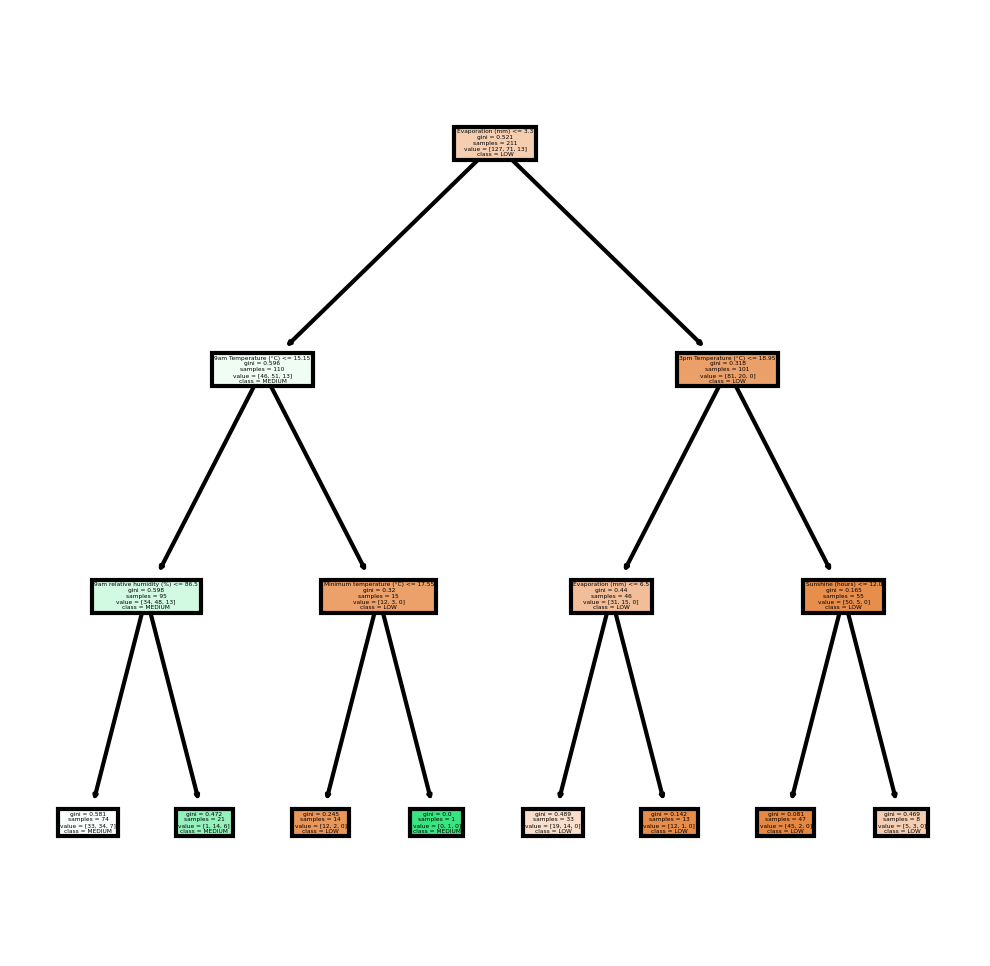

In [153]:
dt = DecisionTreeClassifier(max_depth=3)
clf = dt.fit(X, y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
           feature_names = X.columns, 
           class_names=['LOW','MEDIUM','HIGH', 'Extreme'],
           filled = True);

In [154]:
f = nd.array(X.iloc[90])

In [155]:
f

array([17.5 , 24.2 ,  2.6 ,  1.8 , 18.9 , 94.  , 21.6 , 20.85, 20.25,
       83.  ])

In [156]:
C = f.reshape(-1,10)

In [157]:
C

array([[17.5 , 24.2 ,  2.6 ,  1.8 , 18.9 , 94.  , 21.6 , 20.85, 20.25,
        83.  ]])

In [158]:
prediction1 = dt.predict(C)

In [159]:
prediction1

array([0])

In [160]:
y.loc[0]

0

In [161]:
X.iloc[120,:]

Minimum temperature (°C)      17.7
Maximum temperature (°C)      19.3
Evaporation (mm)               8.6
Sunshine (hours)               0.1
9am Temperature (°C)          17.7
9am relative humidity (%)    100.0
3pm Temperature (°C)          18.3
Avg Temp                      18.5
AvgdayTemp                    18.0
Avghumidity                   85.5
Name: 120, dtype: float64